In [ ]:
# Load librarie
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import sklearn

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from mlxtend.frequent_patterns import apriori, association_rules

warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(rc={"figure.figsize": (20, 15)})
sns.set_style("whitegrid")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = "/content/drive/MyDrive/apriory_diabetes_patient_dataset.csv"
df_train = pd.read_csv(train_path)

In [ ]:
df_train.head()

,Patient_ID,Atherosclerosis,periodontitis,Eye_disease,Heart_Attack,skin_Disease,Arthrities,Erectile_Dysfunction,Hearing_Loss,HTN/HBP
0,1,Yes,No,Yes,Yes,No,No,Yes,Yes,Yes
1,2,Yes,No,No,Yes,No,No,No,Yes,Yes
2,3,No,No,No,No,Yes,No,No,Yes,No
3,4,Yes,Yes,No,Yes,Yes,No,No,No,Yes
4,5,No,No,Yes,No,No,No,No,No,No


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient_ID            88 non-null     int64 
 1   Atherosclerosis       88 non-null     object
 2   periodontitis         88 non-null     object
 3   Eye_disease           88 non-null     object
 4   Heart_Attack          88 non-null     object
 5   skin_Disease          88 non-null     object
 6   Arthrities            88 non-null     object
 7   Erectile_Dysfunction  88 non-null     object
 8   Hearing_Loss          88 non-null     object
 9   HTN/HBP               88 non-null     object
dtypes: int64(1), object(9)
memory usage: 7.0+ KB


In [ ]:
df_train.describe()

,Patient_ID
count,88.000000
mean,44.500000
std,25.547342
min,1.000000
25%,22.750000
50%,44.500000
75%,66.250000
max,88.000000


In [ ]:
number = LabelEncoder()
df_train['Atherosclerosis '] = number.fit_transform(df_train['Atherosclerosis '].astype('str'))
df_train['periodontitis'] = number.fit_transform(df_train['periodontitis'].astype('str'))
df_train['Eye_disease'] = number.fit_transform(df_train['Eye_disease'].astype('str'))
df_train['Heart_Attack'] = number.fit_transform(df_train['Heart_Attack'].astype('str'))
df_train['skin_Disease'] = number.fit_transform(df_train['skin_Disease'].astype('str'))
df_train['Arthrities'] = number.fit_transform(df_train['Arthrities'].astype('str'))
df_train['Erectile_Dysfunction'] = number.fit_transform(df_train['Erectile_Dysfunction'].astype('str'))
df_train['Hearing_Loss'] = number.fit_transform(df_train['Hearing_Loss'].astype('str'))
df_train['HTN/HBP'] = number.fit_transform(df_train['HTN/HBP'].astype('str'))
df_train.head(43)

,Patient_ID,Atherosclerosis,periodontitis,Eye_disease,Heart_Attack,skin_Disease,Arthrities,Erectile_Dysfunction,Hearing_Loss,HTN/HBP
0,1,1,0,1,1,0,0,1,1,1
1,2,1,0,0,1,0,0,0,1,1
2,3,0,0,0,0,1,0,0,1,0
3,4,1,1,0,1,1,0,0,0,1
4,5,0,0,1,0,0,0,0,0,0
5,6,0,1,0,1,0,1,0,0,1
6,7,0,1,0,0,0,0,0,1,0
7,8,0,0,1,0,0,1,0,0,0
8,9,1,1,0,0,0,1,0,0,0
9,10,1,0,1,1,1,0,0,1,1


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Patient_ID            88 non-null     int64
 1   Atherosclerosis       88 non-null     int64
 2   periodontitis         88 non-null     int64
 3   Eye_disease           88 non-null     int64
 4   Heart_Attack          88 non-null     int64
 5   skin_Disease          88 non-null     int64
 6   Arthrities            88 non-null     int64
 7   Erectile_Dysfunction  88 non-null     int64
 8   Hearing_Loss          88 non-null     int64
 9   HTN/HBP               88 non-null     int64
dtypes: int64(10)
memory usage: 7.0 KB


In [ ]:
df_train.columns

Index(['Patient_ID', 'Atherosclerosis ', 'periodontitis', 'Eye_disease',
       'Heart_Attack', 'skin_Disease', 'Arthrities', 'Erectile_Dysfunction',
       'Hearing_Loss', 'HTN/HBP'],
      dtype='object')

In [ ]:
df = df_train.drop(['Patient_ID'], axis = 1)

In [ ]:
df.columns

Index(['Atherosclerosis ', 'periodontitis', 'Eye_disease', 'Heart_Attack',
       'skin_Disease', 'Arthrities', 'Erectile_Dysfunction', 'Hearing_Loss',
       'HTN/HBP'],
      dtype='object')

In [ ]:
df.head()

,Atherosclerosis,periodontitis,Eye_disease,Heart_Attack,skin_Disease,Arthrities,Erectile_Dysfunction,Hearing_Loss,HTN/HBP
0,1,0,1,1,0,0,1,1,1
1,1,0,0,1,0,0,0,1,1
2,0,0,0,0,1,0,0,1,0
3,1,1,0,1,1,0,0,0,1
4,0,0,1,0,0,0,0,0,0


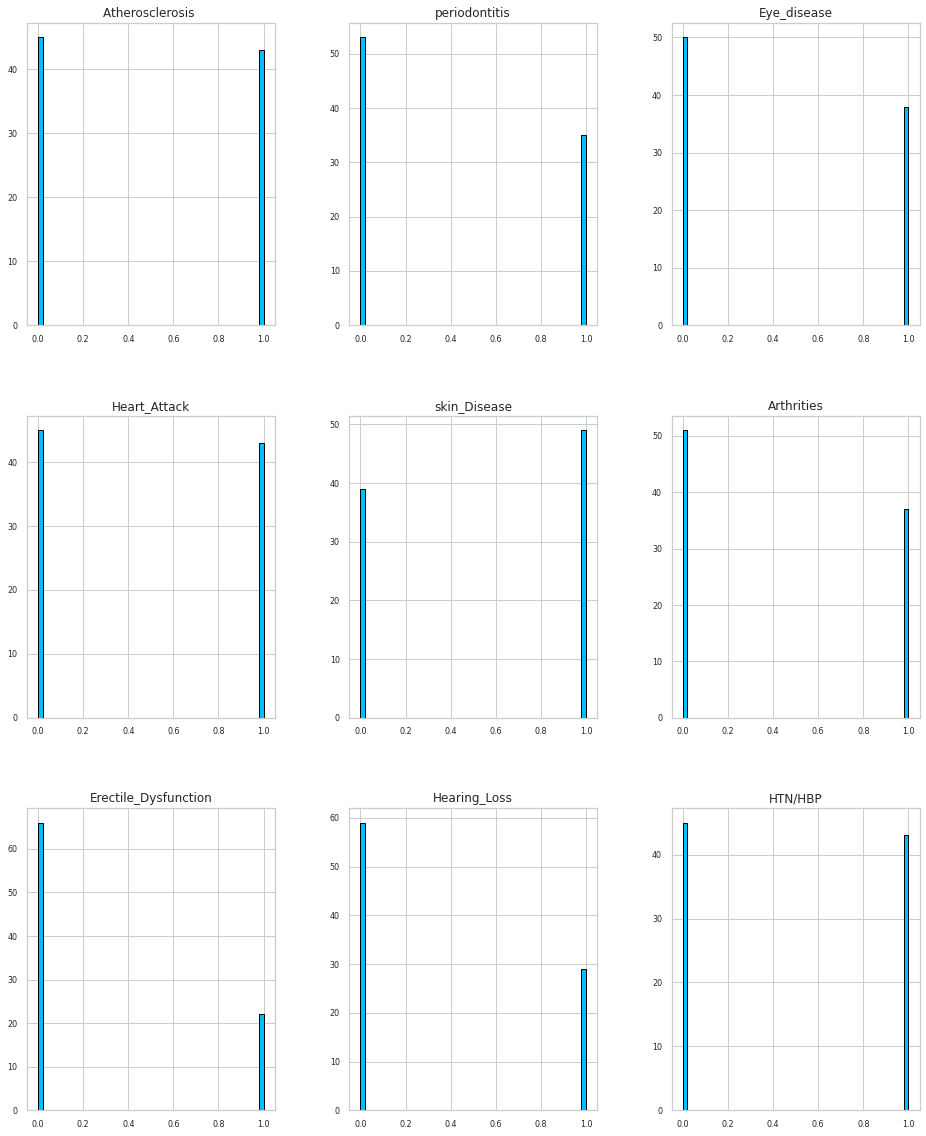

In [ ]:
# Plot the distribution of all the numerical data
fig_ = df.hist(figsize=(16, 20), bins=50, color="deepskyblue",
                         edgecolor="black", xlabelsize=8, ylabelsize=8)

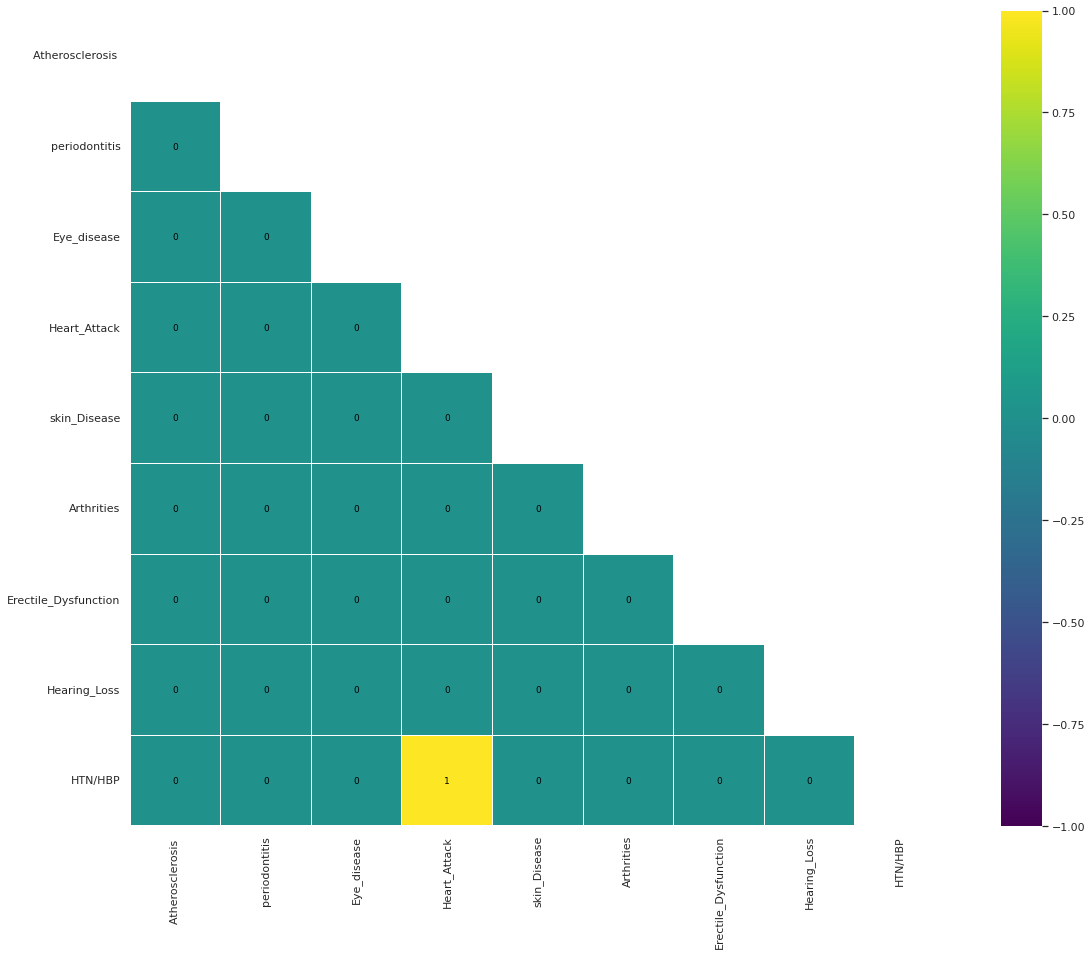

In [ ]:
# Heatmap for all the remaining numerical data including 'Diabetes_awareness' as target column

# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format

# Define correlation matrix
corr_matrix = df.corr()

# Replace correlation < |0.3| by 0 for a better visibility
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0

# Mask the upper part of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Choose the color map
cmap = "viridis"

# plot the heatmap
sns.heatmap(corr_matrix, mask=mask, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 9, "color": "black"}, square=True, cmap=cmap, annot=True)

In [ ]:
def hot_encode(x):
    if(x<= 0):
        return 0
    if(x>= 1):
        return 1

In [ ]:
# Encoding the dataset
basket_encoded = df.applymap(hot_encode)

In [ ]:
# Building the model
frq_items = apriori(basket_encoded, min_support = 0.02, use_colnames = True)
 
# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'])

In [ ]:
rules = pd.DataFrame(rules)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1319,(skin_Disease),"(Hearing_Loss, Eye_disease, periodontitis)",0.56,0.03,0.02,0.04,1.20,0.00,1.01
4061,(skin_Disease),"(Hearing_Loss, Heart_Attack, Eye_disease, peri...",0.56,0.03,0.02,0.04,1.20,0.00,1.01
4332,(skin_Disease),"(Hearing_Loss, Eye_disease, periodontitis, HTN...",0.56,0.03,0.02,0.04,1.20,0.00,1.01
5233,(skin_Disease),"(Erectile_Dysfunction, Heart_Attack, Arthritie...",0.56,0.03,0.02,0.04,1.20,0.00,1.01
5380,(skin_Disease),"(Erectile_Dysfunction, Arthrities, HTN/HBP, He...",0.56,0.03,0.02,0.04,1.20,0.00,1.01
7767,(skin_Disease),"(Erectile_Dysfunction, Atherosclerosis , Heart...",0.56,0.03,0.02,0.04,1.20,0.00,1.01
8076,(skin_Disease),"(Erectile_Dysfunction, Atherosclerosis , Arthr...",0.56,0.03,0.02,0.04,1.20,0.00,1.01
8314,(skin_Disease),"(Heart_Attack, Eye_disease, periodontitis, Hea...",0.56,0.03,0.02,0.04,1.20,0.00,1.01
9108,(skin_Disease),"(Erectile_Dysfunction, Heart_Attack, Arthritie...",0.56,0.03,0.02,0.04,1.20,0.00,1.01
10996,(skin_Disease),"(Erectile_Dysfunction, Atherosclerosis , Heart...",0.56,0.03,0.02,0.04,1.20,0.00,1.01


In [ ]:
rules.nlargest(n =30, columns = 'lift')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10187,"(Erectile_Dysfunction, Heart_Attack, skin_Dise...","(Hearing_Loss, Atherosclerosis , Eye_disease, ...",0.09,0.02,0.02,0.25,11.00,0.02,1.30
10823,"(Erectile_Dysfunction, skin_Disease, HTN/HBP)","(Hearing_Loss, Atherosclerosis , Eye_disease, ...",0.09,0.02,0.02,0.25,11.00,0.02,1.30
11620,"(Erectile_Dysfunction, Heart_Attack, skin_Dise...","(Hearing_Loss, Atherosclerosis , Eye_disease, ...",0.09,0.02,0.02,0.25,11.00,0.02,1.30
11675,"(Erectile_Dysfunction, Heart_Attack, skin_Dise...","(Atherosclerosis , Eye_disease, Arthrities, He...",0.09,0.02,0.02,0.25,11.00,0.02,1.30
11686,"(Erectile_Dysfunction, skin_Disease, HTN/HBP)","(Atherosclerosis , Heart_Attack, Eye_disease, ...",0.09,0.02,0.02,0.25,11.00,0.02,1.30
11384,"(Atherosclerosis , Heart_Attack, Arthrities, s...","(Erectile_Dysfunction, Eye_disease, periodonti...",0.09,0.03,0.03,0.37,11.00,0.03,1.55
11396,"(Atherosclerosis , skin_Disease, Arthrities, H...","(Erectile_Dysfunction, Heart_Attack, Eye_disea...",0.09,0.03,0.03,0.37,11.00,0.03,1.55
10170,"(Hearing_Loss, Atherosclerosis , Eye_disease, ...","(Erectile_Dysfunction, Heart_Attack, skin_Dise...",0.02,0.09,0.02,1.00,11.00,0.02,inf
10794,"(Hearing_Loss, Atherosclerosis , Eye_disease, ...","(Erectile_Dysfunction, skin_Disease, HTN/HBP)",0.02,0.09,0.02,1.00,11.00,0.02,inf
11357,"(Erectile_Dysfunction, Heart_Attack, Eye_disea...","(Atherosclerosis , skin_Disease, Arthrities, H...",0.03,0.09,0.03,1.00,11.00,0.03,inf


In [ ]:
rules.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction'],
      dtype='object')

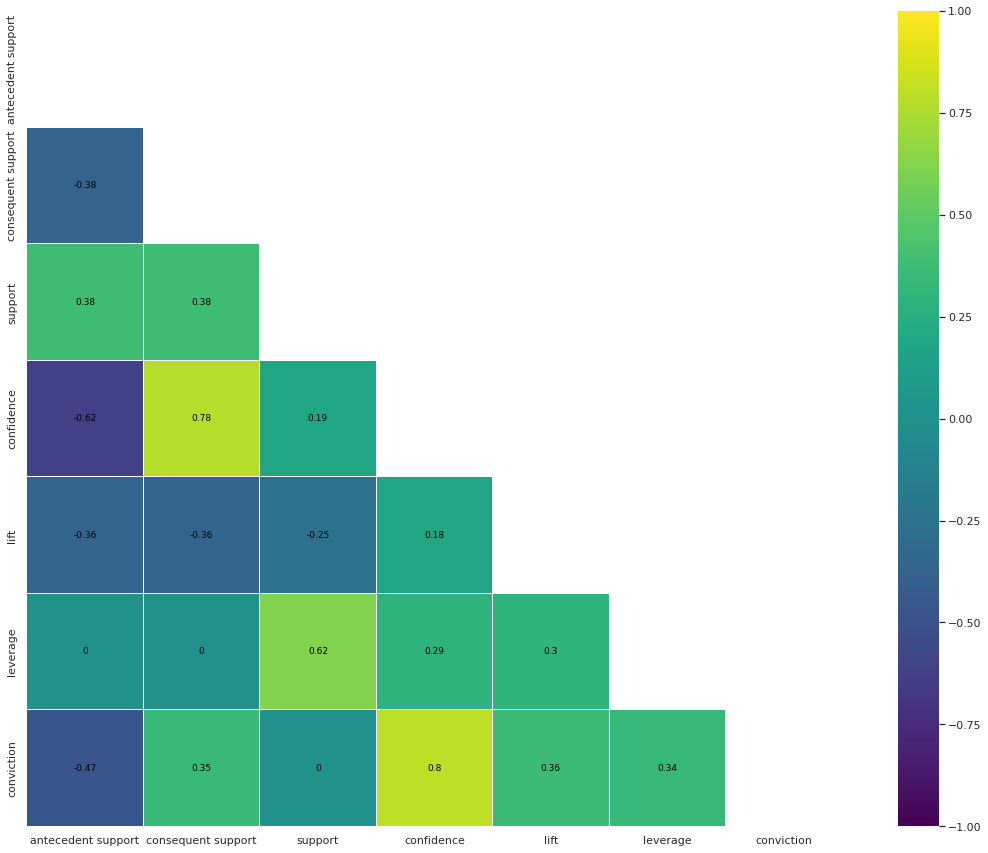

In [ ]:
# Heatmap for all the remaining numerical data including 'Diabetes_awareness' as target column

# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format

# Define correlation matrix
corr_matrix = rules.corr()

# Replace correlation < |0.3| by 0 for a better visibility
corr_matrix[(corr_matrix < 0.11) & (corr_matrix > -0.11)] = 0

# Mask the upper part of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Choose the color map
cmap = "viridis"

# plot the heatmap
sns.heatmap(corr_matrix, mask=mask, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 9, "color": "black"}, square=True, cmap=cmap, annot=True)

In [ ]:
frq_items['length'] = frq_items['itemsets'].apply(lambda x: len(x))
items = pd.DataFrame(frq_items[frq_items['length']==1]["itemsets"])
items.head().style.set_properties(subset=['itemsets'], **{'width': '300px'})

,itemsets
0,frozenset({'Atherosclerosis '})
1,frozenset({'periodontitis'})
2,frozenset({'Eye_disease'})
3,frozenset({'Heart_Attack'})
4,frozenset({'skin_Disease'})


The above itemsets items are most frequently occurs
